In [136]:
import pandas as pd
import numpy as np
import requests
import io

Read parquet file

In [135]:
# URL of the parquet file
dates = pd.date_range(start="2022-12-28", end="today")
url = f"https://wham-nginx-ui-container.mcp.bam.corp.vattenfall.com/public-trades-parsed/{dates.date[0]}.parquet"

# Send a GET request to download the file
response = requests.get(url, verify="Vattenfall_Root_CA_2017.cer")

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a file
    with open(f"{dates.date[0]}.parquet", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded successfully.


In [137]:
df = pd.read_parquet(io.BytesIO(response.content))

In [138]:
df

,source,trade_id,traded_ms,eic,delivery_start_ms,delivery_end_ms,side,price,quantity,company_trade
0,nps,X220416659,1672254496784,10Y1001A1001A47J,1672279200000,1672282800000,2,1190,200,2
1,nps,X220418386,1672255267132,10Y1001A1001A47J,1672261200000,1672264800000,1,5617,1000,2
2,nps,X220418486,1672255310385,10Y1001A1001A47J,1672329600000,1672333200000,1,3430,5000,2
3,epex,1362387310,1672255332336,10Y1001A1001A47J,1672264800000,1672268400000,2,2576,3800,0
4,nps,X220420480,1672255961305,10Y1001A1001A47J,1672261200000,1672264800000,2,6045,1000,2
...,...,...,...,...,...,...,...,...,...,...
3181,nps,X220474315,1672271893637,10Y1001A1001A45N,1672275600000,1672279200000,1,2310,3800,2
3182,nps,X220474317,1672271893637,10Y1001A1001A45N,1672275600000,1672279200000,1,2310,1200,2
3183,nps,X220474351,1672271901111,10Y1001A1001A45N,1672275600000,1672279200000,1,2430,5000,2
3184,nps,X220474384,1672271920644,10Y1001A1001A45N,1672275600000,1672279200000,1,2430,5000,2


In [74]:
df_11 = pd.read_parquet("data/2025-03-11.parquet")
df_12 = pd.read_parquet("data/2025-03-12.parquet")

df = pd.concat([df_11,df_12])


In [109]:
df["eic"].unique()

array(['10Y1001A1001A47J', '10YCA-BULGARIA-R', 'IT-SICI--------Y',
       '10Y1001A1001A44P', '10YNO-1--------2', '10YCH-SWISSGRIDZ',
       '10YLV-1001A00074', '10YNO-4--------9', 'IT-SUD---------W',
       '10YDK-1--------W', '10YNL----------L', '10Y1001A1001A48H',
       '10Y1001A1001A39I', '10YDE-VE-------2', '10Y1001A1001A73I',
       '10YHU-MAVIR----U', '10YPT-REN------W', '10YFI-1--------U',
       '10Y1001A1001A46L', 'IT-CSUD--------B', '10YGB----------A',
       '10YHR-HEP------M', '10Y1001A1001A75E', 'IT-NORD--------N',
       '10YDK-2--------M', '10YFR-RTE------C', '10YAT-APG------L',
       'IT-SARD--------F', '10YBE----------2', '10YES-REE------0',
       '10Y1001C--00096J', '10Y1001A1001A788', 'IT-CNOR--------Y',
       '10YSI-ELES-----O', '10Y1001C--000611', '10YDE-EON------1',
       '10YPL-AREA-----S', '10YDE-ENBW-----N', '10Y1001A1001A71M',
       '10YRO-TEL------P', '10Y1001A1001A68B', '10YCZ-CEPS-----N',
       '10Y1001A1001A74G', 'IT-MALT0-------R', '10YGR-HTSO----

In [76]:
for column in df.columns:
    if "_ms" in column:
        df[column] = pd.to_datetime(df[column], unit="ms", utc=True)

In [77]:
df["contract_length"] = df["delivery_end_ms"] - df["delivery_start_ms"] 

In [110]:
df_NL = df.loc[df["eic"] == '10YDE-EON------1'].copy()

In [111]:
df_NL = df_NL.loc[df_NL["contract_length"] == pd.Timedelta(15, "m")]

In [112]:
df_NL = df_NL.loc[df_NL["trade_id"].duplicated()]
df_NL = df_NL.loc[df_NL["delivery_start_ms"].dt.day == 12]

In [113]:
df_NL.sort_values(by="delivery_start_ms")

,source,trade_id,traded_ms,eic,delivery_start_ms,delivery_end_ms,side,price,quantity,company_trade,contract_length
1324175,epex,1937507510,2025-03-11 23:50:41.737000+00:00,10YDE-EON------1,2025-03-12 00:00:00+00:00,2025-03-12 00:15:00+00:00,1,9608,200,0,0 days 00:15:00
1321215,nps,X640905362,2025-03-11 23:35:22.093000+00:00,10YDE-EON------1,2025-03-12 00:00:00+00:00,2025-03-12 00:15:00+00:00,1,11637,700,2,0 days 00:15:00
1321217,epex,1937498752,2025-03-11 23:35:22.093000+00:00,10YDE-EON------1,2025-03-12 00:00:00+00:00,2025-03-12 00:15:00+00:00,1,11636,100,0,0 days 00:15:00
1321263,epex,1937498930,2025-03-11 23:35:47.704000+00:00,10YDE-EON------1,2025-03-12 00:00:00+00:00,2025-03-12 00:15:00+00:00,1,11742,100,0,0 days 00:15:00
1321271,nps,X640905516,2025-03-11 23:35:47.706000+00:00,10YDE-EON------1,2025-03-12 00:00:00+00:00,2025-03-12 00:15:00+00:00,1,11742,100,2,0 days 00:15:00
...,...,...,...,...,...,...,...,...,...,...,...
1440057,nps,X641811904,2025-03-12 23:17:04.239000+00:00,10YDE-EON------1,2025-03-12 23:45:00+00:00,2025-03-13 00:00:00+00:00,1,10150,100,2,0 days 00:15:00
1440055,nps,X641811898,2025-03-12 23:17:03.780000+00:00,10YDE-EON------1,2025-03-12 23:45:00+00:00,2025-03-13 00:00:00+00:00,1,10277,200,2,0 days 00:15:00
1440053,nps,X641811897,2025-03-12 23:17:03.437000+00:00,10YDE-EON------1,2025-03-12 23:45:00+00:00,2025-03-13 00:00:00+00:00,1,10150,800,2,0 days 00:15:00
1440081,nps,X641811940,2025-03-12 23:17:11.651000+00:00,10YDE-EON------1,2025-03-12 23:45:00+00:00,2025-03-13 00:00:00+00:00,1,10170,100,2,0 days 00:15:00


In [114]:
df_NL["traded_ms"] = df_NL["traded_ms"].dt.round("15min") 

In [115]:
def calculate_weighted_avg_by_delivery_and_trade_time(df):    
    # Group by both delivery period and traded_ms
    grouped = df.groupby(['delivery_start_ms', 'traded_ms'])
    
    # Calculate weighted average price for each group
    def weighted_avg(group):
        return np.sum(group['price'] * group['quantity']) / np.sum(group['quantity'])
    
    weighted_results = grouped.apply(weighted_avg)
    
    # Convert to DataFrame for better presentation
    result = weighted_results.reset_index()
    result.columns = ['delivery_start_ms', 'traded_ms', 'weighted_avg_price']
    
    return result.sort_values(['delivery_start_ms', 'traded_ms'])

In [116]:
df_NL_stats = calculate_weighted_avg_by_delivery_and_trade_time(df_NL)

C:\Users\cah30\AppData\Local\Temp\ipykernel_2072\2758821859.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_results = grouped.apply(weighted_avg)


In [121]:
df_NL_stats

,delivery_start_ms,traded_ms,weighted_avg_price
0,2025-03-12 00:00:00+00:00,2025-03-11 17:45:00+00:00,10990.000000
1,2025-03-12 00:00:00+00:00,2025-03-11 18:00:00+00:00,10694.363636
2,2025-03-12 00:00:00+00:00,2025-03-11 21:45:00+00:00,11268.500000
3,2025-03-12 00:00:00+00:00,2025-03-11 22:00:00+00:00,11025.095238
4,2025-03-12 00:00:00+00:00,2025-03-11 22:30:00+00:00,11260.372414
...,...,...,...
2527,2025-03-12 23:45:00+00:00,2025-03-12 22:45:00+00:00,9930.151261
2528,2025-03-12 23:45:00+00:00,2025-03-12 23:00:00+00:00,9827.365741
2529,2025-03-12 23:45:00+00:00,2025-03-12 23:15:00+00:00,10156.173133
2530,2025-03-12 23:45:00+00:00,2025-03-12 23:30:00+00:00,10339.712540


In [119]:
df_NL_stats.loc[df_NL_stats["delivery_start_ms"] == df_NL_stats["delivery_start_ms"].iloc[500]]

,delivery_start_ms,traded_ms,weighted_avg_price
496,2025-03-12 06:45:00+00:00,2025-03-11 15:15:00+00:00,15950.000000
497,2025-03-12 06:45:00+00:00,2025-03-11 21:45:00+00:00,15402.269231
498,2025-03-12 06:45:00+00:00,2025-03-11 23:45:00+00:00,15550.600000
499,2025-03-12 06:45:00+00:00,2025-03-12 00:15:00+00:00,15215.055556
500,2025-03-12 06:45:00+00:00,2025-03-12 00:45:00+00:00,15250.000000
501,2025-03-12 06:45:00+00:00,2025-03-12 01:45:00+00:00,14931.000000
502,2025-03-12 06:45:00+00:00,2025-03-12 02:00:00+00:00,14825.000000
503,2025-03-12 06:45:00+00:00,2025-03-12 02:30:00+00:00,14712.000000
504,2025-03-12 06:45:00+00:00,2025-03-12 03:15:00+00:00,14947.382353
505,2025-03-12 06:45:00+00:00,2025-03-12 03:30:00+00:00,15012.195402


<Axes: xlabel='traded_ms'>

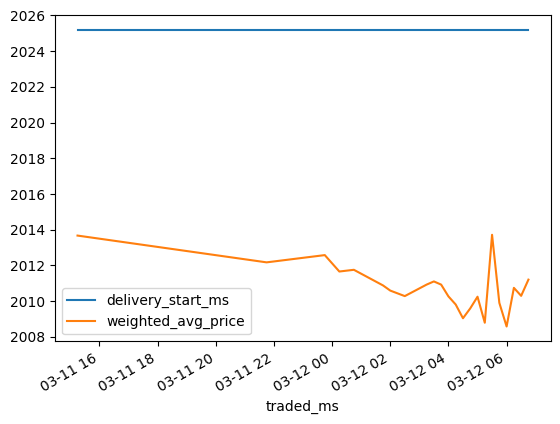

In [120]:
df_NL_stats.loc[df_NL_stats["delivery_start_ms"] == df_NL_stats["delivery_start_ms"].iloc[500]].set_index("traded_ms").plot()